# 時系列データの回帰分析
時系列データであることがあらかじめわかっている場合、その周期の基準となる変数が存在する。もし無い場合はあらかじめ用意する必要がある。ここで、周期となる変数についてダミー変数に変換して回帰分析を行うときに係数を持たせることでより正確に予測を行うことができる。

## ライブラリのインポート

In [1]:
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## データの読み込み

In [2]:
df = pd.read_csv("sarrary.csv", encoding="shift-jis")
df.head()

,年,月,賃金指数
0,1990.0,1,92.7
1,1990.0,2,85.3
2,1990.0,3,93.0
3,1990.0,4,87.7
4,1990.0,5,86.5


## 時系列の特性を意識しないで回帰分析

In [3]:
year = df["年"].values
month = df["月"].values
year = year + (month - 1) / 12

In [4]:
model1 = LR()
model1.fit(year.reshape(-1, 1), df["賃金指数"])
y_pred1 = model1.predict(year.reshape(-1, 1))

## 月をダミー変数に変換

In [5]:
dum = pd.get_dummies(df, columns=["月"])
dum.head()

,年,賃金指数,月_1,月_2,月_3,月_4,月_5,月_6,月_7,月_8,月_9,月_10,月_11,月_12
0,1990.0,92.7,1,0,0,0,0,0,0,0,0,0,0,0
1,1990.0,85.3,0,1,0,0,0,0,0,0,0,0,0,0
2,1990.0,93.0,0,0,1,0,0,0,0,0,0,0,0,0
3,1990.0,87.7,0,0,0,1,0,0,0,0,0,0,0,0
4,1990.0,86.5,0,0,0,0,1,0,0,0,0,0,0,0


## 回帰分析に適合

In [6]:
model2 = LR()
model2.fit(dum.drop("賃金指数", axis=1), dum["賃金指数"])
y_pred2 = model2.predict(dum.drop("賃金指数", axis=1))

## 時系列として予測結果をグラフ化

C:\Users\decar\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\decar\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\decar\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


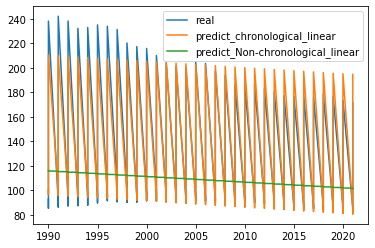

In [7]:
plt.plot(dum["年"], dum["賃金指数"], label="real")
plt.plot(dum["年"], y_pred2, label="predict_chronological_linear")
plt.plot(dum["年"], y_pred1, label="predict_Non-chronological_linear")
plt.legend()
plt.show()

## 残差の確認
時系列の特性を意識したかどうかで残差の傾向が変わってくる。残差は基本的にランダムに現れることが好ましいが、残差に法則性があると回帰分析の結果としては好ましくない。

### 時系列を意識していない場合の残差

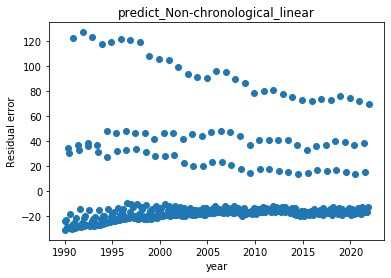

In [8]:
plt.scatter(year, df["賃金指数"].values-y_pred1)
plt.title("predict_Non-chronological_linear")
plt.xlabel("year")
plt.ylabel("Residual error")
plt.show()

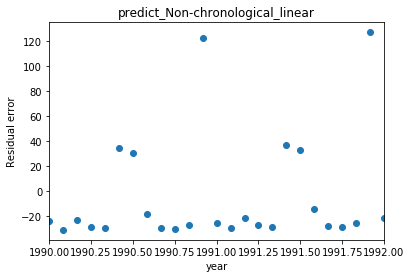

In [9]:
plt.scatter(year, df["賃金指数"].values-y_pred1)
plt.title("predict_Non-chronological_linear")
plt.xlabel("year")
plt.xlim(1990, 1992)
plt.ylabel("Residual error")
plt.show()

残差に周期的と思われる分布が確認できる。そのため、この回帰分析は結果として好ましくない事が分かる。

### 時系列を意識した場合の残差

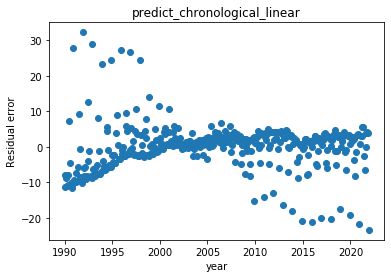

In [10]:
plt.scatter(year, df["賃金指数"].values-y_pred2)
plt.title("predict_chronological_linear")
plt.xlabel("year")
plt.ylabel("Residual error")
plt.show()

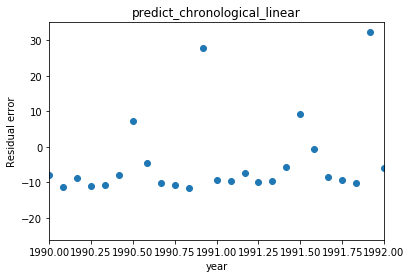

In [11]:
plt.scatter(year, df["賃金指数"].values-y_pred2)
plt.title("predict_chronological_linear")
plt.xlabel("year")
plt.xlim(1990, 1992)
plt.ylabel("Residual error")
plt.show()

この場合でも残差に周期性そのものは現れているが、上限の値が時系列を意識していない回帰分析と比べると非常に小さくなっていることが分かる。

## 係数を確認
係数を確認することで周期となる変数の予測における影響力を確認することができる。ここでは、6月と7月と12月が高い値を出していることができる(賞与月)。このように係数を出すことで周期となる変数の特性が把握できる。

In [12]:
coef = np.hstack((model2.coef_, model2.intercept_))
col = dum.drop("賃金指数", axis=1).columns.tolist()
col.append("切片")
dfc = pd.DataFrame(coef)
dfc.index = col
dfc.columns = ["係数"]
dfc

,係数
年,-0.510892
月_1,-16.044531
月_2,-20.166406
月_3,-14.791406
月_4,-17.891406
月_5,-19.453906
月_6,41.714844
月_7,22.752344
月_8,-14.082031
月_9,-20.069531
